# 4.08 Data Visualizations
#### 01. Importing Libraries
#### 02. Importing Data
#### 03. Bar Charts
#### 04. Histograms
#### 05. Line Charts
#### 06. Scatter Plots

# 01. Importing Libraries

In [1]:
#Import libraries - pandas, Numpy, OS
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [2]:
#Creating a path to the root directory for this project
path = r'C:\Users\theva\OneDrive\CareerFoundry\Data Immersion\A4\Instacart Basket Analysis 11-2022'

In [3]:
#Importing ords_prods_agged
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_agged.pkl'))

In [3]:
#Importing up-to-date project data
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

# 03. Bar Charts

<AxesSubplot:>

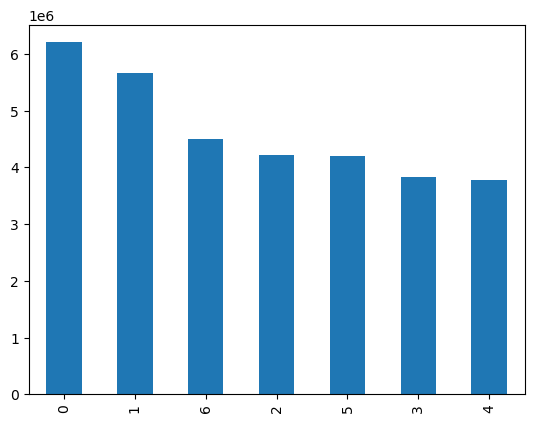

In [4]:
#Bar chart for days of the week
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

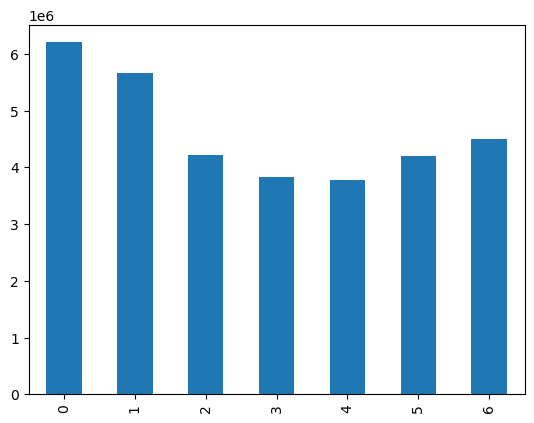

In [7]:
#Assign chart to a variable
bar1 = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [9]:
#Export bar chart via variable.figure.savefig()
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

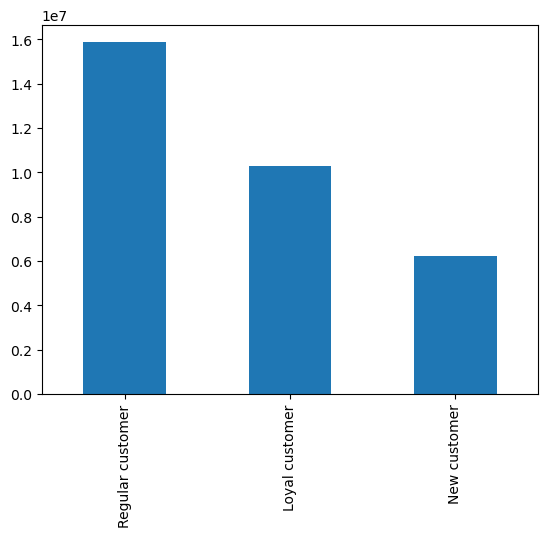

In [8]:
#Bar chart for loyalty flag
bar_loyalty = ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

In [20]:
#Export histogram via variable.figure.savefig()
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

# 04. Histograms

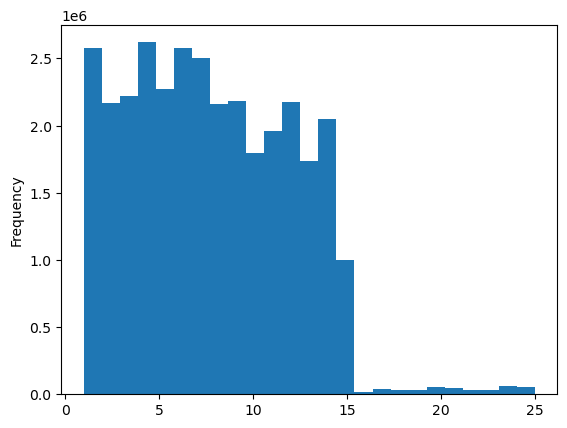

In [15]:
#Historgram with bins of 25
hist1 = ords_prods_merge['prices'].plot.hist(bins = 25)

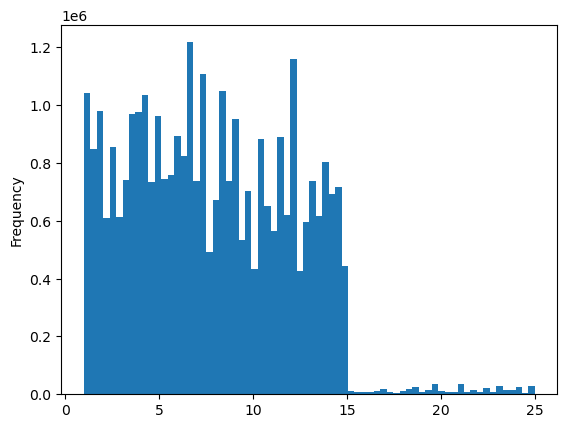

In [16]:
#Historgram with bins of 70 (to increase granularity)
hist2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [17]:
#Export histogram via variable.figure.savefig()
hist1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histo_prices1.png'))
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histo_prices2.png'))

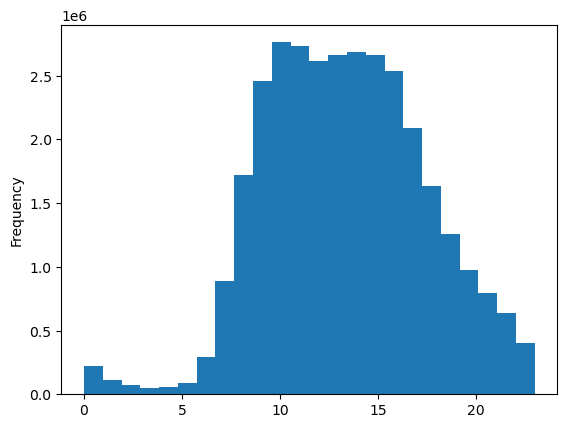

In [7]:
#Historgram with 24 bins
hist_orders_hod = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

The order_hour_of_day histogram shows the slowest point in the day between 11:00 PM and 6:00 AM as well as the busiest point in the day between 10:00 AM and 4:00 PM.

In [19]:
#Export histogram via variable.figure.savefig()
hist_orders_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histo_orders_hod.png'))

# 05. Line Charts

### Prices per day of the week

In [18]:
#Set a random seed value of 4 for reproducability
np.random.seed(4)

In [19]:
#Make a randomized boolean list for ords_prods_merge
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [20]:
#Make a dataframe for the 70%
big = ords_prods_merge[dev]

In [21]:
#Make a dataframe for the remaining values
small = ords_prods_merge[~dev]

In [22]:
#Data check: original # rows, row 'big' + rows 'small', % in 'big', % in 'small'
len(ords_prods_merge), len(big) + len(small), len(big)/len(ords_prods_merge), len(small)/len(ords_prods_merge)

(32404859, 32404859, 0.7000111001871664, 0.2999888998128336)

Check.

In [23]:
#Randomization check
ords_prods_merge['prices'].mean(), big['prices'].mean(), small['prices'].mean()

(7.790994092171152, 7.79087984122341, 7.791260694244707)

Close enough.

In [24]:
#reduce the dataframe to necessary columns for the line chart
df_2 = small[['orders_day_of_week','prices']]

In [25]:
df_2.shape

(9721098, 2)

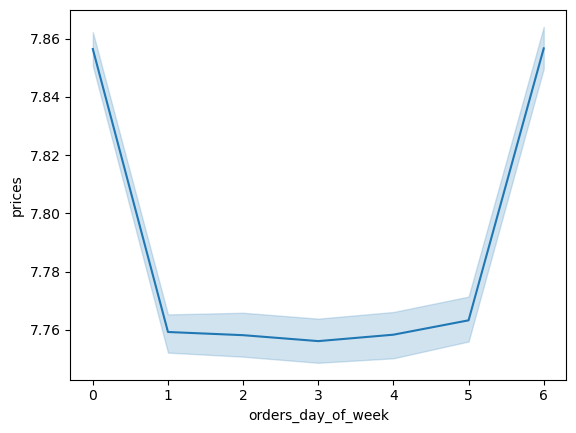

In [26]:
#Make a line chart
line1 = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [27]:
#Export line chart via variable.figure.savefig()
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow_1.png'))

### Difference in expenditure (the “prices” column) depending on the hour of the day.

In [9]:
#Set a random seed value of 4 for reproducability
np.random.seed(4)

In [10]:
#Make a randomized boolean list for ords_prods_merge
opc_dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [11]:
#Make a dataframe for the 70% with the relevant
opc_big = ords_prods_cust[opc_dev]

In [12]:
#Make a dataframe for the remaining values
opc_small = ords_prods_cust[~opc_dev]

In [13]:
#Data check: original # rows, row 'big' + rows 'small', % in 'big', % in 'small'
len(ords_prods_cust), len(opc_big) + len(opc_small), len(opc_big)/len(ords_prods_cust), len(opc_small)/len(ords_prods_cust)

(32404859, 32404859, 0.7000111001871664, 0.2999888998128336)

Check.

In [14]:
#Randomization check
ords_prods_cust['prices'].mean(), opc_big['prices'].mean(), opc_small['prices'].mean()

(7.790994092347015, 7.791771887012884, 7.789179138893408)

Close enough.

In [15]:
#reduce the small sample dataframe to necessary columns for the line chart
opc_2 = opc_small[['order_hour_of_day','prices']]

In [16]:
opc_2.shape

(9721098, 2)

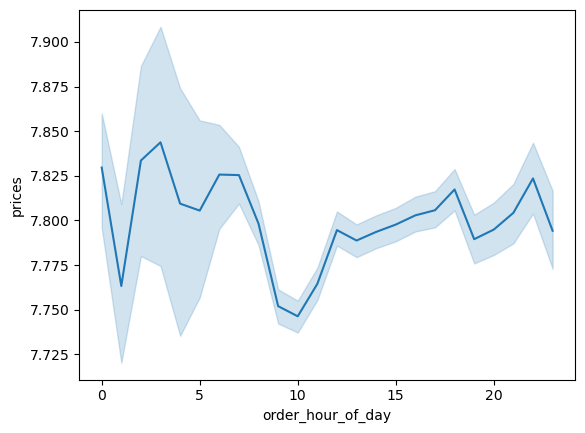

In [17]:
#Make a line chart
opc_line = sns.lineplot(data = opc_2, x = 'order_hour_of_day',y = 'prices')

Notes: It seems that higher priced items are bought between 3:00 AM and 7:00 AM, but with a lower degree of predictability; while less expensive items are purchased between 9:00 AM and 11:00 AM with a higher degree of predeictability; and average-priced items are bought with reasonable predictability and consistency between 12:00 PM and 11:00 PM.

In [21]:
#Export line chart via variable.figure.savefig()
opc_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hod.png'))

# 06. Scatter Plots

### Age vs income scatter plot

In [24]:
#reduce the small sample dataframe to necessary columns for the scatter plot
opc_age_inc = opc_small[['age','income']]

In [25]:
opc_age_inc.shape

(9721098, 2)

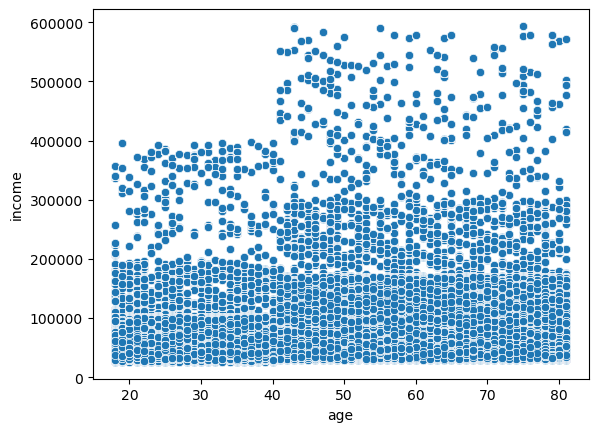

In [28]:
#Make a scatter plot
sctr_age_inc = sns.scatterplot(x = 'age', y = 'income',data = opc_age_inc)

Notes: 18-40 year olds have the income range - averaging between 25,000 and 200,000 with an upper limit of 400,000. 41-81 year olds have an average income of 25,000 to 300,000 with an upper limit of 600,000. 

Those 40 and under tend to have less spending power than those over 40. However, to a comparison of income to debt ratio to age would give a more accurate indicator of spending power.

In [29]:
#Export line chart via variable.figure.savefig()
sctr_age_inc.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))